## Squeeze Theorem (a.k.a. Sandwich Theorem)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy

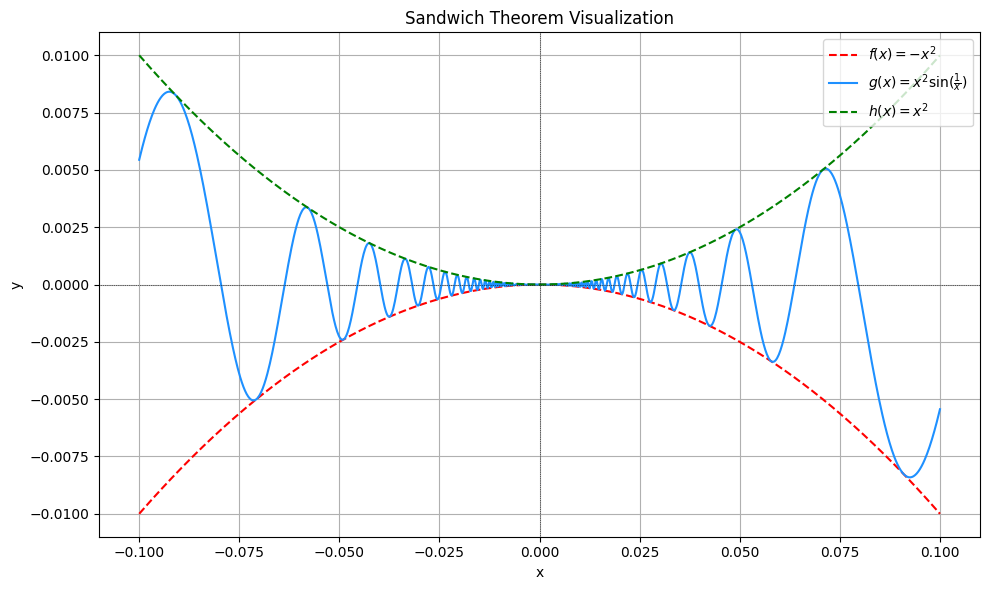

In [2]:
x = np.linspace(-0.1, 0.1, 1000)
x = x[x != 0]

# Define the functions
f = -x**2
g = x**2 * np.sin(1/x)
h = x**2

plt.figure(figsize=(10, 6))
plt.plot(x, f, label=r'$f(x) = -x^2$', color='red', linestyle='--')
plt.plot(x, g, label=r'$g(x) = x^2 \sin(\frac{1}{x})$', color='dodgerblue')
plt.plot(x, h, label=r'$h(x) = x^2$', color='green', linestyle='--')

plt.axhline(0, color='black', linewidth=0.5, linestyle=':')
plt.axvline(0, color='black', linewidth=0.5, linestyle=':')

plt.title("Sandwich Theorem Visualization")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()

If we have functions \( f(x), g(x), h(x) \) and there's a range of \( x \) around \( c \) such that:

$$
f(x) \leq g(x) \leq h(x)
$$

and:

$$
\lim_{x \to c} f(x) = \lim_{x \to c} h(x) = L
$$

Then we can conclude:

$$
\lim_{x \to c} g(x) = L
$$

This theorem is useful when a function is hard to evaluate directly, but it's squeezed between two others whose limits are easy to find.

If you're into deeper math, you can find formal proofs of this theorem in **Real Analysis** or **Functional Analysis** texts.


*Example of Sandwich theorem use case*

Proof that 
$$\lim_{x \to 0}\frac{sin(x)}{x} = 1$$

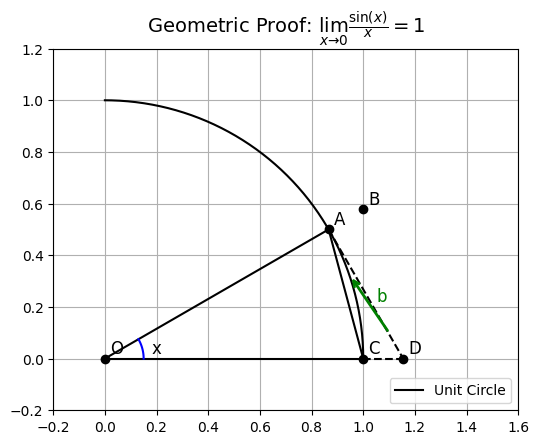

In [4]:
def point_on_circle(angle):
    return np.cos(angle), np.sin(angle)

x_angle = np.pi / 6

O = (0, 0)
A = point_on_circle(x_angle)
C = (1, 0)
B = (1, np.tan(x_angle))
D = (1 / np.cos(x_angle), 0)


fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')

theta = np.linspace(0, np.pi/2, 300)
x = np.cos(theta)
y = np.sin(theta)
ax.plot(x, y, 'k', label='Unit Circle')

# ax.fill([O[0], C[0], A[0]], [O[1], C[1], A[1]], color='skyblue', label='Triangle OAC')
# ax.fill([A[0], B[0], C[0]], [A[1], B[1], C[1]], color='purple', alpha=0.6, label='Sector/Thin Slice')
# ax.fill([A[0], C[0], D[0]], [A[1], C[1], D[1]], color='lightgreen', alpha=0.6, label='Triangle ACD')


ax.plot([O[0], C[0]], [O[1], C[1]], 'k-')
ax.plot([O[0], A[0]], [O[1], A[1]], 'k-')
ax.plot([A[0], C[0]], [A[1], C[1]], 'k-')
ax.plot([A[0], D[0]], [A[1], D[1]], 'k--')
ax.plot([C[0], D[0]], [C[1], D[1]], 'k--')


arc = np.linspace(0, x_angle, 100)
ax.plot(0.15 * np.cos(arc), 0.15 * np.sin(arc), 'blue')
ax.text(0.18, 0.02, 'x', fontsize=12)
ax.annotate('', xy=(0.95, 0.32), xytext=(1.1, 0.1),
            arrowprops=dict(arrowstyle='->', color='green', lw=2))
ax.text(1.05, 0.22, 'b', color='green', fontsize=12)
points = {'O': O, 'A': A, 'B': B, 'C': C, 'D': D}
for label, (x, y) in points.items():
    ax.plot(x, y, 'ko')
    ax.text(x + 0.02, y + 0.02, label, fontsize=12)

ax.set_xlim(-0.2, 1.6)
ax.set_ylim(-0.2, 1.2)
plt.grid(True)
plt.title(r"Geometric Proof: $\lim_{x \to 0} \frac{\sin(x)}{x} = 1$", fontsize=14)
plt.legend(loc='lower right')
plt.show()

#### Proof: $\lim_{x \to 0} \frac{\sin(x)}{x} = 1$

##### Instruction
Use geometry or inequalities.  
For $x \in (0, \frac{\pi}{2})$, we have the following inequality:

$$
\cos(x) \leq \frac{\sin(x)}{x} \leq 1
$$

##### Geometric Idea

Consider a unit circle (radius = 1), and angle $x$ (in radians), with $x \in (0, \frac{\pi}{2})$. We can compare the following **three areas**:

1. **Area of triangle $OAC$** (formed by radius and vertical):
   $$
   \text{Area}_{\triangle OAC} = \frac{1}{2} \sin(x)
   $$

2. **Area of sector $OAC$** (circular slice):
   $$
   \text{Area}_{\text{sector}} = \frac{1}{2} x
   $$

3. **Area of triangle $OAD$** (formed by tangent line):
   $$
   \text{Area}_{\triangle OAD} = \frac{1}{2} \tan(x)
   $$

So we get the inequality from comparing areas:

$$
\sin(x) < x < \tan(x)
$$

##### Derive the Squeeze

Divide all sides by $\sin(x)$ (positive for $x \in (0, \frac{\pi}{2})$):

$$
1 < \frac{x}{\sin(x)} < \frac{1}{\cos(x)}
$$

Take reciprocals (reverse inequalities):

$$
\cos(x) < \frac{\sin(x)}{x} < 1
$$

##### Apply the Squeeze Theorem

As $x \to 0^+$:

- $\lim_{x \to 0^+} \cos(x) = 1$
- $\lim_{x \to 0^+} 1 = 1$

So by the **Sandwich Theorem**:

$$
\lim_{x \to 0^+} \frac{\sin(x)}{x} = 1
$$

Since $\frac{\sin(x)}{x}$ is an **even function** (i.e., symmetric around $x=0$), the same holds for the left-hand limit:

$$
\lim_{x \to 0^-} \frac{\sin(x)}{x} = 1
$$

##### Final Result

$$
{\lim_{x \to 0} \frac{\sin(x)}{x} = 1}
$$


In [6]:
# It have same result if we using SymPy
x = sympy.Symbol('x')
expr = sympy.sin(x) / x
limit_result = sympy.limit(expr, x, 0)
print(limit_result)

1
